# Random Forests

In [25]:
# Mathematical operation/data storage
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Cross validation
from sklearn.model_selection import train_test_split
# Model
from sklearn.ensemble import RandomForestClassifier
# Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Load in the Data Set

Columns description:

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [29]:
# Load the data set
heart_df = pd.read_csv('./data/heart.csv', index_col=0)
# Shows a few rows of the data set
heart_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# Shows some summary statistics on the dataset
heart_df.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# Shows some basic information about the fields of the data set
heart_df.info()

# Note that all fields are scalars and we have no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


We want to make sure that we are training our random forest models on balanced data. In the following cell, we see how many examples of healthy and diseased hears we have.

Healthy:  138
Heart Dieseas:  165
Total:  303


Text(0.5, 1.0, 'Percent for each Example Class')

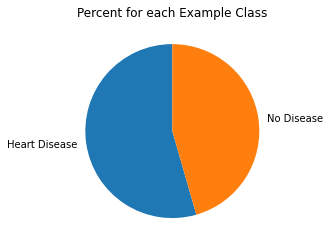

In [32]:
# Count the number of diseased examples
disease = len(heart_df[heart_df['target'] == 1])
# Cound the number of not diseased examples
no_disease = len(heart_df[heart_df['target']== 0])

# Print out the counts of each class
# TODO: Print the number of healthy samples we have
print("Healthy: ", )
# TODO: Print the number of diseased samples we have
print("Heart Diesease: ", )
print("Total: ", str(no_disease+disease))

# Make a Pie chart to represent how many example we have in each class
plt.pie([disease, no_disease], labels=['Heart Disease', 'No Disease'], startangle=90)
plt.title('Percent for each Example Class')

The next step is to seperate our data into the feature vectors and the labels. We will use the `drop` function to get the feature vectors, and pull a column out of th `pandas` dataframe to get the labels.

In [41]:
# Extract feature vectors and labels
X = heart_df.drop('target',1)
y = heart_df['target']

# Convert from pandas objects to numpy objects
X = X.values
y = y.values

Now that we have split the data into feature vectors and labels, we need to split it into a training data set and a testing data set. This is done using the `train_test_split` function from `sklearn` as we have seen previously.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a Random Forest Classifier

Now that the data is formated we are ready to create our first random forest classifier. In `sklearn` the `RandomeForestClassifier` we will be working with takes arguments for the number of estimators in the model (`n_estimator`) and the maximum tree depth for each classifier (`max_depth`). For the first try, fill in these parameters as you see fit, but remember the trade off being made in terms of model complexity and its ability to generalize to new data.

For more information on this model and its implementation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [35]:
#TODO: Set the parameters of the RandomForestClassifier
model = RandomForestClassifier(n_estimators = , max_depth = )

## Cross Validation

Model validation is a key step in machine learning. Below, we have defined a cross validation function that we will use.

In [52]:
def k_fold_cross_validation(X, y, k, model):
    # This will store the accuracy for each fold
    accuracy = np.zeros((k,1))
    
    # This will count which fold we are on
    fold = 0
    
    # This is a function that we will use to split the data into training and validation sets
    # TODO: Fill in this line
    skf = StratifiedKFold(n_splits = )
    
    # This loop executes 1 time per fold
    for train_indices, test_indices in skf.split(X,y):
        
        # Get the training and validation data sets
        X_train, X_validation = X[train_indices], X[test_indices]
        Y_train, Y_validation = y[train_indices], y[test_indices]

        # Train the model on the training data
        # TODO: Fill in this line
        model.fit(   ,   )

        # Get the predictions from the validation data
        # TODO: Fill in this line
        predictions=model.predict(   )
                
        # Calculate the accuracy
        # TODO: Fill in this line
        accuracy[fold] = accuracy_score(   ,   )
        fold += 1
        
    return np.mean(accuracy), np.std(accuracy)

Using this cross fold validation function, we can test the model we defined above.

In [55]:
# TODO: Fill in k, the number of folds to be used
k = 

# Call the cross fold validation function
# TODO: Fill in the parameters for the next line
mean_accuracy, std_accuracy = k_fold_cross_validation()

# TODO: Fill out the statements to print the results
print('Mean Accuracy:', )
print('Standard Deviation of Accuracy', )

Mean Accuracy: 0.8055555555555555
Standard Deviation of Accuracy 0.12365531876988675


## Searching for Hyper Parameters

Above, you selected the number of classifiers and the max depth of classifier you wanted your model to have, and then you computed accuracy scores using cross validation. Often, it is difficult to have intuition for setting hyper parameters, so it can be useful to do a search for the optimal values. Below, we show one such methof of doing this search.

In [64]:
# TODO: modify this array to check the number of estimators you are interested in
num_estimators = []

# TODO: modify this array to check the max_depths values you are interested in
max_depth = []

# TODO: set the number of folds for cross validation
k = 

# These values will be used to store the best classifier we find
max_accuracy_mean = 0
max_accuracy_std = 0
best_num_estimators = 0
best_max_depth = 0

# This loop will check all values in the array num_estimators you made above
for num_estimator in num_estimators:
    # This loop will check all values in the array max_depths you made above
    for depth in max_depth:
        
        # Creates a RandomForestClassifier with the parameters specified by the loops
        model = RandomForestClassifier(n_estimators=num_estimator, max_depth=depth)
        # Performes cross fold evaluation on this model
        # TODO: Fill out the parameters for cross validation
        accuracy, std = k_fold_cross_validation(   ,   ,   ,   )
        
        # Saves the hyperparameters for the best RandomForestClassifier
        # TODO: Finish the if statement to save the parameters of this model if it is the best so far
        if accuracy >
            max_accuracy_mean = accuracy
            max_accuracy_std = std
            best_num_estimators = num_estimator
            best_max_depth = depth
            
# Prints the best results
print('Maximum Accuracy Mean:', max_accuracy_mean)
print('Maximum Accuracy Standard Deviation:', max_accuracy_std)
print('Number of Estimators:', best_num_estimators)
print('Maximum Depth:', best_max_depth)

Maximum Accuracy Mean: 0.818452380952381
Maximum Accuracy Standard Deviation: 0.05465180443399059
Number of Estimators: 19
Maximum Depth: 20


# Evaluate your Random Forest Classifier

Now that you have experience making `RandomForestClassifiers` and have spent some time optimizing your hyperparameters, we can test these models on the testing dataset. We all have the same testing data set, so lets see whose model can get the highest accuracy score.

In [65]:
# TODO: Fill in the parameters based on the best results you found above 
model = RandomForestClassifier(n_estimators = , max_depth = )

# TODO: Fit the model using all of the training data
model.fit(   ,   )

# TODO: Make predictions on the testing data
predictions = model.predict(   )

# TODO: Fill in the parameters to calculate training accuracy
testing_accuracy = accuracy_score(   ,   )

# TODO: Print the results
print('Testing Score:',   )

Testing Score: 0.8852459016393442


In case your are interested, some other performance metrics can be calculated for your model below. It is important to remember that the searching process we preformed above for hyperparameter selection was specific to the accuracy score, which we used throughout. If you wanted to optimize for F1 Score, AUC Value, or anything else, a similar process could be done using other scoring metrics. The code in the cell below is just to give you an example of how these metrics can quickly be calculated

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc_value = auc(fpr, tpr)
f1 = f1_score(y_test, predictions)
print('F1 Score:', f1)
print('AUC Value:', auc_value)

F1 Score: 0.888888888888889
AUC Value: 0.8890086206896552


### Visualizing features importances

Now that we are done developing our model, a question we may ask is which features were most significant in the `RandomForestClassifier`. Fortunatly, `sklearn` gave this model the `feature_importance_` attribute, which is used to rank the significance of each feature based on the gini index. For this excercise, the actual gini score of each feature is not important, but the overall rank order of the features is what we would like to highlight.

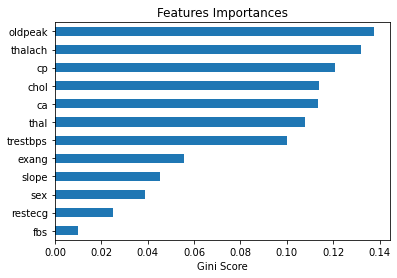

In [78]:
# Create a pd.Series of features importances
importances = pd.Series(data=model.feature_importances_, index=heart_df.drop('target',1).columns)

# Sort importances
importances_sorted = importances.sort_values() 

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.xlabel('Gini Score')
plt.savefig('./image/feature_importances.png')


> reference: https://github.com/goodboychan/goodboychan.github.io/blob/master/_notebooks/2020-06-04-01-Bagging-and-Random-Forests.ipynb